# Browser Performance Testing with Chrome DevTools Protocol

## Table of Contents

- [Introduction](#introduction)
  - [Project Overview](#project-overview)
  - [Objectives and Goals](#objectives-and-goals)
  - [Challenges and Solutions](#challenges-and-solutions)
    - [Using ChromeDevToolsProtocol vs. Webdriver BiDi](#using-chromedevtoolsprotocol-vs-webdriver-bidi)
    - [Isolating Network and DOM Activities](#isolating-network-and-dom-activities)
    - [Avoiding Instrumented Testing Approaches](#avoiding-instrumented-testing-approaches)
  - [Structure of the Report](#structure-of-the-report)
  - [Conclusion](#conclusion)
- [Methodology for Browser Event Measurement](#methodology-for-browser-event-measurement)
  - [Detailed Exploration of the Challenges with Traditional Measurement Methods](#detailed-exploration-of-the-challenges-with-traditional-measurement-methods)
    - [Limitations of Appium's Client/Server HTTP Connections](#limitations-of-appium-s-client-server-http-connections)
    - [The Need for Methodological Purity in Event Measurement](#the-need-for-methodological-purity-in-event-measurement)
  - [Introduction of the WebSocket-Based Approach and Its Advantages](#introduction-of-the-websocket-based-approach-and-its-advantages)
    - [Leveraging WebSockets for Direct Browser Interaction](#leveraging-websockets-for-direct-browser-interaction)
    - [Technical Details of WebSocket Connections](#technical-details-of-websocket-connections)
    - [Benefits of the WebSocket Approach](#benefits-of-the-websocket-approach)
  - [Comprehensive Definitions of Captured Network and DOM Events](#comprehensive-definitions-of-captured-network-and-dom-events)
    - [Network Events](#network-events)
    - [DOM Events](#dom-events)
  - [Explanation of the Data Collection and Isolation Methodologies](#explanation-of-the-data-collection-and-isolation-methodologies)
    - [Data Collection Process](#data-collection-process)
    - [Isolation Methodology: Subtracting Network Event Timings from DOM Events](#isolation-methodology--subtracting-network-event-timings-from-dom-events)
    - [Reasoning Behind the Calculation Methodologies](#reasoning-behind-the-calculation-methodologies)
    - [Metrics Collection and Calculation Reasoning](#metrics-collection-and-calculation-reasoning)
    - [Reasoning Behind the Metrics and Their Calculations](#reasoning-behind-the-metrics-and-their-calculations)
    - [Ensuring Metric Accuracy and Integrity](#ensuring-metric-accuracy-and-integrity)
- [Data Analysis and Visualization](#data-analysis-and-visualization)
  - [Presentation of Various Visualization Techniques](#presentation-of-various-visualization-techniques)
    - [1\. Correlation Heatmaps](#1--correlation-heatmaps)
    - [2\. Line Plots](#2--line-plots)
    - [3\. Box Plots](#3--box-plots)
    - [4\. Violin Plots](#4--violin-plots)
    - [5\. Grouped Bar Charts](#5--grouped-bar-charts)
    - [6\. Rolling Averages](#6--rolling-averages)
  - [Interpretation of Visual Data to Validate Measurement Methodologies and Identify Optimization Opportunities](#interpretation-of-visual-data-to-validate-measurement-methodologies-and-identify-optimization-opportunities)
    - [Validating Measurement Methodologies](#validating-measurement-methodologies)
    - [Identifying Optimization Opportunities](#identifying-optimization-opportunities)
  - [Testing Data and Visualizations with Heatmaps](#testing-data-and-visualizations-with-heatmaps)
    - [Purpose of Heatmap-Based Testing](#purpose-of-heatmap-based-testing)
    - [Methodology for Heatmap-Based Testing](#methodology-for-heatmap-based-testing)
    - [Addressing and Rectifying Discrepancies](#addressing-and-rectifying-discrepancies)
    - [Handling Unavoidable Correlations](#handling-unavoidable-correlations)
  - [Actionable Outcomes and Insights](#actionable-outcomes-and-insights)

# Introduction

In the ever-evolving landscape of web and mobile applications, browser
performance plays a pivotal role in shaping user experiences and determining the
success of digital products. Efficiently measuring and analyzing browser
performance metrics is essential for developers and performance engineers to
identify bottlenecks, optimize resource loading, and ensure seamless
interactions for end-users.

## Project Overview

The **Browser Performance Testing and Analysis** project is dedicated to
establishing a robust framework for accurately capturing and isolating browser
performance metrics. Traditional methodologies, such as those leveraging
Appium's typical client/server HTTP connections, often introduce measurement
inaccuracies due to the inherent overhead and potential interference with
network events. These inaccuracies can obscure the true performance
characteristics of both network and Document Object Model (DOM) activities
within browsers.

To address these challenges, our project adopts a methodology of utilizing
WebSocket connections in conjunction with the Chrome DevTools Protocol (CDP).
This strategy aims to bypass the limitations of HTTP-based measurements,
enabling the collection of more precise and reliable performance data. By
directly interfacing with the browser through WebSockets, we can capture
granular network and DOM events without the distortion introduced by
intermediary layers.

## Objectives and Goals

The primary objectives of this project are:

1.  **Accurate Event Measurement:**

- **Network Events:** Capture detailed metrics related to DNS lookups, TCP
  handshakes, SSL negotiations, and content downloads.

- **DOM Events:** Isolate and measure DOM parsing, rendering times, and browser
  processing tasks independently from network influences.

2.  **Methodological Accuracy:**

- Utilize WebSocket connections to interact with browsers, ensuring that
  performance measurements are not adversely affected by the testing tools
  themselves.

- Avoid tightly coupled testing solutions that require instrumented builds,
  thereby maintaining flexibility and scalability across different applications
  and build types.

3.  **Data Consistency and Normalization:**

- Implement a standardized methodology that can be applied uniformly across
  various applications, including third-party and competitor apps.

- Ensure that performance data is comparable and reliable, facilitating
  meaningful cross-application analyses.

4.  **Insightful Analysis and Visualization:**

- Develop comprehensive visualization tools, including both static and
  interactive heatmaps, to analyze correlations between network and DOM metrics.

- Validate the effectiveness of our isolation techniques by demonstrating
  minimal or zero correlation between network and DOM activities, thereby
  confirming the accuracy of our measurements.

## Challenges and Solutions

### Using ChromeDevToolsProtocol vs. Webdriver BiDi

The use of the **Webdriver BiDi** is the preferred approach for this project;
however, the Python language bindings for Webdriver BiDi are incomplete,
somewhat limited, and not on the roadmap to be completed anytime soon, which
severely limits our access to the browser performance, network, and DOM events
via this standardized Websocket-based approach.

As a result, we can still use the same technical approach, but it will be using
CDP, which currently has the drawback of potentially changing for each browser
version released - requiring more vigilance in tracking and maintaining CDP API
versions for the browser under test.

While this does incur a maintanence cost, this enables us to get the performance
metrics we need without being entirely blocked from creating an accurate and
reliable solution.

### Isolating Network and DOM Activities

One of the core challenges in browser performance testing is accurately
isolating network activities from DOM processing to obtain true measurements of
each. Network events inherently influence the performance of DOM events, making
it difficult to discern their individual contributions. Our solution involves:

- **Subtraction Methodology:** By meticulously capturing network event timings
  and subtracting these from the corresponding DOM event timings, we aim to
  isolate the pure performance metrics of DOM activities.

- **WebSocket Integration:** Utilizing WebSockets to establish a direct and
  low-overhead connection with the browser ensures that the measurement process
  itself does not introduce significant delays or distortions.

### Avoiding Instrumented Testing Approaches

Instrumented testing tools like Espresso, while powerful, are tightly coupled
with the application's build process. This tight coupling can limit the
flexibility and scalability of performance testing across different applications
and build types. To overcome this, our approach:

- **Build Artifact Agnosticism:** Develop a testing framework that operates
  independently of the application's build process, allowing us to test any
  build variant---be it debug, beta, or production---without necessitating
  instrumented builds.

- **Consistency Across Applications:** Enable the testing of both proprietary
  and third-party applications using the same methodology, ensuring that
  performance data is normalized and comparable across different apps.

## Structure of the Report

This report is organized into several key sections, each addressing distinct
aspects of the project:

1.  **Methodology for Browser Event Measurement:**

- Detailed exploration of the challenges with traditional measurement methods.

- Introduction of the WebSocket-based approach and its advantages.

- Comprehensive definitions of captured network and DOM events.

- Explanation of the data collection and isolation methodologies.

2.  **Data Analysis and Visualization:**

- Presentation of various visualization techniques, including correlation
  heatmaps, to analyze performance metrics.

- Interpretation of visual data to validate measurement methodologies and
  identify optimization opportunities.

3.  **Future Improvements and Enhancements:**

- Identification of current limitations and proposed solutions to enhance
  measurement accuracy.

- Strategies for automating data validation and expanding metric coverage.

4.  **Conclusion:**

- Summary of achievements and insights gained.

- Outline of next steps and future directions for the project.

5.  **Appendices:**

- Supplementary materials, including code repositories, references, and a
  glossary of technical terms.

## Conclusion

Accurate and reliable browser performance testing is indispensable for
developing high-quality web and mobile applications. By adopting a
methodologically 'pure' approach that leverages WebSocket connections and the
Chrome DevTools Protocol, this project strives to overcome the limitations of
traditional measurement methods. Through meticulous data collection, isolation
of network and DOM activities, and insightful data visualization, we aim to
provide actionable insights that drive performance optimizations and enhance
user experiences.

As we continue to refine our methodologies and address existing challenges, this
framework will serve as a foundational tool for performance engineers and
developers seeking to achieve excellence in browser performance.

# Methodology for Browser Event Measurement

Accurate measurement of browser performance metrics is foundational to
understanding and optimizing user experiences in web and mobile applications.
This section delves into the methodology employed for capturing and isolating
browser events, highlighting the challenges with traditional measurement methods
and presenting a refined approach using WebSocket connections. By meticulously
defining captured events and elucidating the data collection and isolation
processes, we aim to ensure the precision and reliability of our performance
metrics.

## Detailed Exploration of the Challenges with Traditional Measurement Methods

### Limitations of Appium's Client/Server HTTP Connections

Appium has long been a staple in mobile application testing, offering robust
tools for automating interactions with mobile devices. However, when it comes to
capturing browser performance metrics, especially those related to network and
Document Object Model (DOM) events, relying solely on Appium's typical
client/server HTTP connections introduces several challenges:

1.  **Measurement Overhead:**

- **Latency Introduction:** The HTTP-based communication between the Appium
  server and the client introduces additional latency. This latency can skew
  timing measurements, making it difficult to discern the true performance
  characteristics of the browser.

- **Asynchronous Delays:** HTTP requests are inherently asynchronous. This
  asynchronicity can lead to delays in capturing real-time events, resulting in
  incomplete or fragmented data.

2.  **Interference with Network Events:**

- **HTTP Traffic Collision:** Since Appium communicates over HTTP, it can
  interfere with the very network events it aims to measure. For instance,
  capturing DNS lookups or TCP handshakes becomes unreliable as Appium's traffic
  may be conflated with the browser's network activities.

- **Resource Contention:** Simultaneous HTTP traffic from Appium and the browser
  can lead to resource contention, where both processes compete for network
  bandwidth and system resources, further distorting performance metrics.

3.  **Limited Granularity:**

- **Broad Event Categories:** Appium's HTTP connections provide high-level event
  categories without the granularity needed for in-depth performance analysis.
  Detailed metrics, such as specific timings for DNS resolution or SSL
  negotiations, are often inaccessible or imprecise.

- **Inadequate Event Sequencing:** The sequence and precise timing of DOM events
  relative to network events are challenging to capture accurately, hindering
  the ability to isolate and analyze these events effectively.

4.  **Reliability Concerns:**

- **Inconsistent Data Capture:** Variability in network conditions and Appium's
  own communication overhead can lead to inconsistent data capture, making it
  difficult to establish reliable performance baselines.

- **Potential Data Loss:** High traffic volumes or network instability can
  result in data loss or incomplete event logging, compromising the integrity of
  performance analyses.

### The Need for Methodological Purity in Event Measurement

Given these challenges, there is a pressing need for a more methodologically
pure approach to capturing browser performance metrics. Purity, in this context,
refers to the isolation of measurement processes from the very activities being
measured, ensuring that the act of measurement does not interfere with or
distort the data being collected. Achieving this purity is essential for:

- **Accurate Performance Insights:** Reliable data is paramount for identifying
  true performance bottlenecks and areas for optimization.

- **Consistent Benchmarking:** Establishing consistent and comparable
  performance benchmarks across different applications and environments.

- **Scalability and Flexibility:** Developing a testing framework that can adapt
  to various applications, build types, and testing scenarios without being
  constrained by inherent measurement limitations.

## Introduction of the WebSocket-Based Approach and Its Advantages

### Leveraging WebSockets for Direct Browser Interaction

To overcome the limitations posed by traditional HTTP-based measurement methods,
our project adopts a WebSocket-based approach in conjunction with the Chrome
DevTools Protocol (CDP). This strategy facilitates a direct and low-overhead
connection between our testing framework and the browser, enabling precise and
unobtrusive capture of performance events.

### Technical Details of WebSocket Connections

1.  **Protocol Fundamentals:**

- **WebSocket Overview:** WebSockets provide a full-duplex communication channel
  over a single, long-lived connection. Unlike HTTP, which follows a
  request-response pattern, WebSockets allow continuous data exchange between
  the client and server.

- **Handshake Process:** Establishing a WebSocket connection begins with an HTTP
  handshake where the client sends an `Upgrade` request to the server,
  indicating the desire to switch protocols. Upon acceptance, the connection
  transitions from HTTP to the WebSocket protocol.

2.  **Integration with Chrome DevTools Protocol (CDP):**

- **CDP Overview:** CDP is a set of APIs that allow for tools to instrument,
  inspect, debug, and profile Chromium-based browsers. By interfacing with CDP,
  we can access detailed browser internals, including network and DOM events.

- **Event Subscription:** Through the WebSocket connection, we subscribe to
  specific CDP events related to network activities (e.g.,
  `Network.requestWillBeSent`, `Network.responseReceived`) and DOM events (e.g.,
  `DOM.contentEventFired`, `Page.loadEventFired`).

3.  **Advantages of WebSocket-Based CDP Integration:**

- **Reduced Overhead:** WebSocket's persistent connection minimizes the latency
  introduced by establishing multiple HTTP requests, ensuring that event timings
  are captured more accurately.

- **Real-Time Data Capture:** The full-duplex nature allows for real-time event
  monitoring, facilitating immediate and continuous data collection without
  interruption.

- **Granular Event Access:** CDP provides access to a comprehensive set of
  browser events with high temporal precision, enabling detailed performance
  analyses.

### Benefits of the WebSocket Approach

1.  **Enhanced Measurement Accuracy:**

- By eliminating the intermediary HTTP layer, we reduce potential sources of
  latency and interference, resulting in more accurate timing measurements.

2.  **Comprehensive Event Coverage:**

- The WebSocket-CDP integration allows for the capture of a wide array of
  network and DOM events with high granularity, enabling thorough performance
  assessments.

3.  **Scalability and Flexibility:**

- This approach is agnostic to the application being tested, allowing for the
  measurement of both proprietary and third-party applications without requiring
  instrumented builds.

4.  **Minimal Intrusion:**

- The direct connection ensures that the measurement process does not
  significantly interfere with the browser's operations, preserving the
  integrity of the captured data.

## Comprehensive Definitions of Captured Network and DOM Events

Accurate performance measurement hinges on the precise definition and
understanding of the events being captured. Below is a comprehensive inventory
of the network and DOM events our methodology targets, along with their
definitions and significance.

### Network Events

| **Event Name** | **Description** |

## | --------------------------- |

|

| `dns_lookup_time_ms` | Time taken to resolve the domain name via DNS. |

| `tcp_handshake_time_ms` | Duration of the TCP handshake process establishing a
connection between client and server. |

| `ssl_time_ms` | Time spent establishing a secure SSL/TLS connection. |

| `ttfb_ms` | Time from sending the request to receiving the first byte of the
response (Time To First Byte). |

| `content_download_time_ms` | Duration taken to download the response content
from the server to the client. |

| `total_network_time_ms` | Overall time spent on network activities,
encompassing DNS resolution, TCP handshake, SSL negotiation, TTFB, and content
download. |

| `total_transfer_size_bytes` | Total size of all resources transferred during
the page load, measured in bytes. |

### DOM Events

| **Event Name** | **Description** |

## | ------------------------------------- |

|

| `adjusted_dom_parsing_time_ms` | DOM parsing time after subtracting
overlapping network event times to isolate pure DOM processing duration. |

| `adjusted_rendering_time_ms` | Rendering time adjusted for network influences,
representing the time taken to render the parsed DOM. |

| `adjusted_browser_processing_time_ms` | Time spent on browser processing
tasks, adjusted for network events, indicating the efficiency of browser
operations. |

| `total_page_load_time_ms` | Complete time taken to load the page, from the
initial request to the final render. |

| `first_paint_ms` | Time when the browser first renders any part of the page,
providing an early indication of load progress. |

| `first_contentful_paint_ms` | Time when the browser renders the first piece of
content from the DOM, such as text or images. |

| `average_resource_processing_time_ms` | Average time spent processing
individual resources, offering insights into resource-specific performance. |

## Explanation of the Data Collection and Isolation Methodologies

### Data Collection Process

Our data collection methodology revolves around establishing a direct WebSocket
connection to the browser using the Chrome DevTools Protocol (CDP). This
connection enables the real-time capture of detailed network and DOM events
without the interference inherent in traditional HTTP-based measurement methods.

1.  **Establishing the WebSocket Connection:**

- Initiate a WebSocket connection from the testing framework (running on a
  Macbook) to the browser instance on the connected Android device.

- Authenticate and configure the connection to ensure secure and stable
  communication channels.

2.  **Subscribing to Relevant CDP Events:**

- Utilize CDP to subscribe to specific network and DOM events that are critical
  for performance measurement.

- Ensure comprehensive coverage by subscribing to all necessary event streams,
  capturing the full lifecycle of network requests and DOM processing.

3.  **Real-Time Event Logging:**

- Implement listeners for each subscribed event, logging the precise timing and
  relevant data points.

- Aggregate and timestamp events to facilitate accurate correlation and
  subsequent analysis.

4.  **Data Storage and Processing:**

- Store captured events in structured data formats (e.g., CSV, JSON) for ease of
  analysis.

- Implement data validation and cleaning processes to ensure data integrity,
  including handling missing or anomalous values through median imputation.

### Isolation Methodology: Subtracting Network Event Timings from DOM Events

The core objective of our isolation methodology is to discern the true
performance characteristics of DOM activities by eliminating the confounding
influences of network events. This is achieved through a systematic subtraction
of network event timings from corresponding DOM event durations.

1.  **Identifying Overlapping Events:**

- Map each DOM event to its relevant network events based on their temporal
  sequence and functional dependencies.

- For instance, `adjusted_dom_parsing_time_ms` is derived by subtracting
  `dns_lookup_time_ms`, `tcp_handshake_time_ms`, `ssl_time_ms`, and `ttfb_ms`
  from the total DOM parsing time.

2.  **Performing the Subtraction:**

- Utilize calculated network event metrics to adjust the raw DOM event timings.

- Ensure that the subtraction accounts for all relevant network activities that
  directly impact the DOM processes being measured.

3.  **Ensuring Metric Accuracy:**

- Validate the adjusted metrics through correlation analyses, ensuring minimal
  or zero correlation between isolated network and DOM metrics.

- Continuously refine the subtraction logic to address any residual overlaps or
  measurement discrepancies.

### Reasoning Behind the Calculation Methodologies

1.  **Eliminating Measurement Bias:**

- By isolating DOM event timings from network activities, we eliminate the
  measurement bias introduced by network-induced latencies, leading to more
  accurate representations of browser performance.

2.  **Enhancing Data Reliability:**

- Subtracting network event timings ensures that the DOM metrics reflect only
  the browser's internal processing efficiencies, devoid of external network
  influences. This enhances the reliability of the data for performance
  optimization purposes.

3.  **Facilitating Comparative Analyses:**

- With isolated metrics, it becomes feasible to conduct meaningful comparative
  analyses across different browsers, applications, and testing environments, as
  the data is standardized and free from extraneous network-related variances.

4.  **Supporting Targeted Optimizations:**

- Understanding the pure DOM processing times allows developers and performance
  engineers to identify and target specific areas within the browser's rendering
  and processing pipelines for optimization, without being misled by
  network-related artifacts.

### Metrics Collection and Calculation Reasoning

Our methodology captures a suite of metrics that provide a holistic view of both
network and DOM performance. Below is an inventory of the key metrics collected,
the rationale behind their calculation, and the reasoning for their inclusion in
our performance analysis framework.

1.  **`dns_lookup_time_ms`:**

- **Definition:** Measures the time taken to resolve a domain name into an IP
  address.

- **Calculation:** The duration from the initiation of the DNS lookup to its
  completion.

- **Reasoning:** DNS resolution is a fundamental step in network communications.
  High DNS lookup times can significantly delay resource fetching, impacting
  overall page load times.

2.  **`tcp_handshake_time_ms`:**

- **Definition:** Captures the duration of the TCP handshake process
  establishing a connection between the client and server.

- **Calculation:** Time from sending the initial SYN packet to receiving the
  final ACK packet in the TCP handshake.

- **Reasoning:** Efficient TCP handshakes are crucial for establishing quick and
  reliable connections. Prolonged handshake times can contribute to increased
  latency.

3.  **`ssl_time_ms`:**

- **Definition:** Measures the time spent establishing a secure SSL/TLS
  connection.

- **Calculation:** Duration from initiating the SSL handshake to its completion.

- **Reasoning:** SSL/TLS negotiations add security overhead. Optimizing SSL
  times can enhance secure connection establishment without compromising
  security.

4.  **`ttfb_ms` (Time To First Byte):**

- **Definition:** The time elapsed from sending the HTTP request to receiving
  the first byte of the response.

- **Calculation:** The duration from request dispatch to the arrival of the
  first byte.

- **Reasoning:** TTFB is a critical metric indicating server responsiveness.
  Lower TTFB values correlate with faster perceived page loads.

5.  **`content_download_time_ms`:**

- **Definition:** Tracks the time taken to download the response content from
  the server to the client.

- **Calculation:** Time from receiving the first byte to the completion of
  content download.

- **Reasoning:** Efficient content delivery is essential for swift page
  rendering. Prolonged download times can delay resource availability, impacting
  user experience.

6.  **`total_network_time_ms`:**

- **Definition:** Aggregates the total time spent on network activities,
  encompassing DNS lookups, TCP handshakes, SSL negotiations, TTFB, and content
  downloads.

- **Calculation:** Sum of all individual network event timings.

- **Reasoning:** Provides a comprehensive view of the network-related delays
  contributing to overall page load times.

7.  **`total_transfer_size_bytes`:**

- **Definition:** Represents the cumulative size of all resources transferred
  during the page load, measured in bytes.

- **Calculation:** Aggregated size of all fetched resources (e.g., HTML, CSS,
  JavaScript, images).

- **Reasoning:** Larger transfer sizes can lead to increased download times and
  resource processing overhead, affecting page performance.

8.  **`adjusted_dom_parsing_time_ms`:**

- **Definition:** DOM parsing time after subtracting overlapping network event
  times to isolate pure DOM processing duration.

- **Calculation:** Raw DOM parsing time minus `dns_lookup_time_ms`,
  `tcp_handshake_time_ms`, `ssl_time_ms`, and `ttfb_ms`.

- **Reasoning:** Isolates the time spent solely on parsing the DOM, eliminating
  network-induced latencies for accurate DOM performance assessment.

9.  **`adjusted_rendering_time_ms`:**

- **Definition:** Rendering time adjusted for network influences, representing
  the time taken to render the parsed DOM.

- **Calculation:** Raw rendering time minus relevant network event timings.

- **Reasoning:** Focuses on the browser's rendering efficiency, independent of
  network-related delays, facilitating targeted rendering optimizations.

10. **`adjusted_browser_processing_time_ms`:**

- **Definition:** Time spent on browser processing tasks, adjusted for network
  events.

- **Calculation:** Raw browser processing time minus relevant network event
  timings.

- **Reasoning:** Highlights the efficiency of the browser's internal processing
  mechanisms, enabling identification of areas for performance enhancements.

11. **`total_page_load_time_ms`:**

- **Definition:** Complete time taken to load the page, from the initial request
  to the final render.

- **Calculation:** Sum of all network and DOM event timings.

- **Reasoning:** Serves as an overarching metric for overall page performance,
  encapsulating both network and rendering efficiencies.

12. **`first_paint_ms`:**

- **Definition:** Time when the browser first renders any part of the page.

- **Calculation:** Time from the start of the page load to the first visual
  change in the viewport.

- **Reasoning:** Early visual feedback improves user perception of page load
  speed, enhancing perceived performance.

13. **`first_contentful_paint_ms`:**

- **Definition:** Time when the browser renders the first piece of content from
  the DOM, such as text or images.

- **Calculation:** Duration from the start of the page load to the first
  contentful paint event.

- **Reasoning:** Indicates the point at which meaningful content becomes visible
  to the user, a key metric for user experience.

14. **`average_resource_processing_time_ms`:**

- **Definition:** Average time spent processing individual resources, offering
  insights into resource-specific performance.

- **Calculation:** Total processing time for all resources divided by the number
  of resources.

- **Reasoning:** Identifies specific resources that may be causing delays,
  enabling targeted optimizations.

### Reasoning Behind the Metrics and Their Calculations

1.  **Isolation for Precision:**

- By subtracting network event timings from DOM event durations, we isolate the
  browser's internal processing times. This isolation ensures that our
  DOM-related metrics accurately reflect the browser's efficiency without the
  distortion of network-induced latencies.

2.  **Comprehensive Performance Profiling:**

- Capturing both network and DOM events provides a holistic view of the factors
  influencing page load times. This comprehensive profiling allows for the
  identification of bottlenecks across different stages of the page loading
  process.

3.  **Actionable Insights for Optimization:**

- Detailed metrics facilitate targeted performance optimizations. For example,
  understanding that `ssl_time_ms` is disproportionately high can prompt
  investigations into SSL configurations or certificate management practices.

4.  **Consistency and Reliability:**

- Standardizing the calculation methodologies ensures consistency across
  different testing scenarios and applications. Reliable metrics form the
  backbone of meaningful performance analyses and benchmarking.

5.  **User-Centric Performance Indicators:**

- Metrics like `first_paint_ms` and `first_contentful_paint_ms` align closely
  with user perceptions of load speed, ensuring that performance optimizations
  directly enhance user experience.

6.  **Scalability of Methodology:**

- The structured approach to data collection and metric isolation is scalable
  across various applications and testing environments. This scalability ensures
  that the methodology remains robust as the project expands to encompass
  diverse testing scenarios.

### Ensuring Metric Accuracy and Integrity

To uphold the accuracy and integrity of our metrics, the following practices are
implemented:

1.  **Median Imputation for Missing Values:**

- Any missing or anomalous values (e.g., zeros resulting from DNS caching) are
  imputed with the median of the respective metric. This imputation minimizes
  the impact of outliers and ensures continuity in data analysis.

2.  **Correlation Analysis for Verification:**

- Post-isolation, correlation heatmaps are generated to verify that network and
  DOM metrics exhibit minimal or no correlation. This verification confirms the
  effectiveness of our isolation methodology.

3.  **Continuous Refinement:**

- The methodology is iteratively refined based on analytical insights and
  feedback, ensuring that the metrics remain relevant and accurately reflective
  of browser performance dynamics.

4.  **Comprehensive Documentation:**

- Detailed documentation of event definitions, data collection processes, and
  calculation methodologies ensures transparency and facilitates peer review and
  validation of our performance measurement framework.

By meticulously defining and isolating network and DOM events, and by
implementing robust data collection and processing methodologies, our approach
ensures that the captured metrics provide a precise and reliable foundation for
browser performance analysis and optimization.

# Data Analysis and Visualization

Effective data analysis and visualization are critical components of our
**Browser Performance Testing and Analysis** project. By transforming raw
performance metrics into meaningful visual representations, we can uncover
patterns, validate our measurement methodologies, and identify actionable
opportunities for optimization. This section outlines the various visualization
techniques employed, the rationale behind their selection, and the insights and
outcomes we aim to achieve through these analyses.

## Presentation of Various Visualization Techniques

To comprehensively analyze the performance metrics collected, we utilize a
diverse set of visualization techniques. Each technique is chosen based on its
ability to highlight specific aspects of the data, facilitate comparative
analyses, and support our overarching objectives of performance optimization and
methodological validation.

### 1\. Correlation Heatmaps

**Purpose:**

Correlation heatmaps are employed to visualize the relationships between
different performance metrics. By displaying correlation coefficients in a
matrix format, heatmaps allow for the quick identification of strong positive or
negative correlations between variables.

**Rationale for Selection:**

- **Ease of Interpretation:** Heatmaps provide an intuitive visual
  representation of correlations, making it easier to spot significant
  relationships.

- **Comprehensive Overview:** They allow for the simultaneous comparison of
  multiple metric pairs, facilitating the detection of complex
  interdependencies.

- **Validation of Methodology:** By analyzing correlations between network and
  DOM metrics, we can assess the effectiveness of our isolation techniques.

**Intent and Insights:**

- **Identify Redundancies:** Detect metrics that are highly correlated,
  indicating potential redundancies in our data collection.

- **Spot Anomalies:** Highlight unexpected correlations that may suggest
  measurement inaccuracies or overlooked factors.

- **Methodology Verification:** Confirm that isolated DOM metrics exhibit
  minimal correlation with network metrics, validating our subtraction approach.

### 2\. Line Plots

**Purpose:**

Line plots track the progression of performance metrics over time or across
different test runs. They are particularly useful for observing trends,
fluctuations, and long-term performance changes.

**Rationale for Selection:**

- **Trend Analysis:** Enable the detection of performance improvements or
  degradations over successive iterations.

- **Temporal Patterns:** Reveal cyclic behaviors or anomalies occurring at
  specific intervals.

- **Benchmarking:** Facilitate comparison against baseline measurements or
  performance targets.

**Intent and Insights:**

- **Monitor Stability:** Ensure that performance metrics remain consistent
  across multiple test runs.

- **Detect Performance Shifts:** Identify when and where significant changes in
  performance occur, prompting further investigation.

- **Evaluate Optimization Efforts:** Assess the impact of implemented
  optimizations by comparing before-and-after performance trends.

### 3\. Box Plots

**Purpose:**

Box plots summarize the distribution of performance metrics, highlighting the
median, quartiles, and potential outliers. They provide a concise statistical
overview of the data's spread and central tendency.

**Rationale for Selection:**

- **Distribution Insight:** Offer a clear view of the variability and
  distribution of each metric.

- **Outlier Detection:** Easily identify outliers that may indicate measurement
  errors or exceptional performance cases.

- **Comparative Analysis:** Allow for side-by-side comparisons of metric
  distributions across different browsers or test scenarios.

**Intent and Insights:**

- **Assess Variability:** Understand the consistency of performance metrics and
  identify metrics with high variability.

- **Quality Control:** Detect and address outliers to maintain data integrity.

- **Cross-Browser Comparison:** Compare how different browsers perform across
  the same set of metrics, identifying strengths and weaknesses.

### 4\. Violin Plots

**Purpose:**

Violin plots combine the features of box plots and kernel density plots,
providing a more detailed view of the data distribution. They illustrate the
probability density of the data at different values.

**Rationale for Selection:**

- **Enhanced Distribution Visualization:** Offer a more nuanced view of the
  data's distribution compared to box plots alone.

- **Symmetry and Skewness Detection:** Highlight the symmetry or skewness in
  metric distributions, offering insights into performance consistency.

- **Comparative Richness:** Facilitate richer comparisons between multiple
  groups or conditions.

**Intent and Insights:**

- **Detailed Distribution Analysis:** Gain deeper insights into how performance
  metrics are distributed, beyond the summary statistics.

- **Identify Subgroups:** Detect if there are distinct subgroups within the data
  that behave differently.

- **Support Decision-Making:** Use the detailed distribution information to
  inform targeted optimizations and improvements.

### 5\. Grouped Bar Charts

**Purpose:**

Grouped bar charts compare multiple metrics across different categories, such as
browsers or test environments. They allow for straightforward comparison of
metric values within each group.

**Rationale for Selection:**

- **Clear Comparisons:** Facilitate easy comparison of specific metrics across
  different categories.

- **Highlighting Differences:** Emphasize disparities in performance between
  groups, aiding in the identification of best-performing browsers or
  configurations.

- **Simplified Presentation:** Present complex data in an accessible and
  visually appealing format.

**Intent and Insights:**

- **Benchmarking Performance:** Compare how different browsers stack up against
  each other on key performance metrics.

- **Identify Leaders and Laggers:** Quickly identify which browsers lead or lag
  in specific areas, guiding optimization priorities.

- **Stakeholder Communication:** Provide clear and compelling visual evidence of
  performance differences for stakeholders and decision-makers.

### 6\. Rolling Averages

**Purpose:**

Rolling averages smooth out short-term fluctuations and highlight longer-term
trends in performance metrics. They provide a clearer view of underlying
patterns without the noise of transient variations.

**Rationale for Selection:**

- **Trend Clarity:** Enhance the visibility of trends by reducing data
  volatility.

- **Performance Monitoring:** Enable ongoing monitoring of performance over
  time, detecting gradual improvements or degradations.

- **Data Smoothing:** Facilitate the identification of consistent performance
  patterns by filtering out random noise.

**Intent and Insights:**

- **Detect Long-Term Trends:** Observe sustained performance changes that may
  result from optimizations or external factors.

- **Improve Data Interpretation:** Make it easier to interpret performance data
  by highlighting meaningful trends.

- **Support Strategic Decisions:** Use trend information to inform strategic
  decisions regarding browser optimizations and feature implementations.

## Interpretation of Visual Data to Validate Measurement Methodologies and Identify Optimization Opportunities

The visualizations generated through the aforementioned techniques serve dual
purposes: validating the accuracy and reliability of our measurement
methodologies and uncovering actionable insights for performance optimization.

### Validating Measurement Methodologies

1.  **Correlation Heatmaps:**

- **Expected Outcomes:**

- **Minimal Correlation Between Network and DOM Metrics:** After isolating DOM
  events by subtracting network timings, we expect little to no correlation
  between network and DOM metrics.

- **High Intra-Category Correlation:** Metrics within the same category (network
  or DOM) should exhibit higher correlations, reflecting inherent relationships.

- **Validation Process:**

- **P-Value Analysis:** Assess statistical significance of correlations using
  p-values. Asterisks (\*) denote correlations with p-values below 0.05,
  indicating significance.

- **Heatmap Interpretation:** Darker colors represent stronger correlations,
  while lighter colors indicate weaker or no correlations. This visual cue helps
  quickly identify significant relationships.

- **Outcome Verification:**

- **Methodology Effectiveness:** Low or non-existent correlations between
  network and DOM metrics confirm the effectiveness of our isolation
  methodology.

- **Metric Reliability:** Consistent intra-category correlations validate that
  metrics within the same category are reliably captured and reflect their
  expected relationships.

2.  **Box and Violin Plots:**

- **Expected Outcomes:**

- **Consistent Distributions:** Post-isolation, DOM metrics should exhibit
  distributions that align with their expected performance characteristics, free
  from network-induced variances.

- **Outlier Management:** Few to no outliers should exist in the data,
  indicating stable and reliable measurements.

- **Validation Process:**

- **Distribution Analysis:** Examine the shape and spread of the distributions
  to ensure they reflect accurate performance measurements.

- **Outlier Detection:** Identify and investigate any outliers to determine if
  they result from measurement errors or genuine performance anomalies.

- **Outcome Verification:**

- **Data Integrity:** Consistent and expected distributions confirm the
  reliability of our data collection and cleaning processes.

- **Measurement Precision:** Minimal outliers indicate precise and accurate
  performance measurements.

3.  **Rolling Averages and Line Plots:**

- **Expected Outcomes:**

- **Stable Trends:** Performance metrics should display stable trends without
  erratic fluctuations, reflecting consistent measurement conditions.

- **Alignment with Optimization Efforts:** Any observed improvements or
  degradations should correspond with implemented optimizations or external
  factors.

- **Validation Process:**

- **Trend Consistency:** Ensure that trends align with anticipated performance
  behaviors and optimization milestones.

- **Anomaly Detection:** Spot any unexpected trends that may indicate underlying
  issues with measurement methodologies or external influences.

- **Outcome Verification:**

- **Methodology Stability:** Stable and consistent trends affirm that our
  measurement methodologies are not introducing biases or inconsistencies.

- **Performance Alignment:** Correlating observed trends with known optimization
  efforts verifies that our data accurately reflects performance changes.

### Identifying Optimization Opportunities

1.  **Correlation Heatmaps:**

- **Insight Extraction:** Identify metrics that exhibit strong correlations,
  signaling potential areas for optimization. For example, a high correlation
  between `ssl_time_ms` and `total_network_time_ms` suggests that SSL
  negotiations significantly impact overall network performance.

- **Actionable Outcomes:** Targeted optimizations can be implemented to reduce
  the impact of correlated metrics, such as streamlining SSL configurations to
  enhance network performance.

2.  **Box and Violin Plots:**

- **Performance Distribution:** Analyze the spread and central tendency of
  performance metrics to identify areas with high variability or suboptimal
  performance.

- **Actionable Outcomes:** Address inconsistencies by standardizing resource
  loading practices or optimizing resource sizes to achieve more uniform
  performance.

3.  **Grouped Bar Charts:**

- **Cross-Browser Comparisons:** Evaluate how different browsers perform across
  key metrics, identifying which browsers require targeted optimizations.

- **Actionable Outcomes:** Focus optimization efforts on browsers that lag in
  specific metrics to ensure a consistent user experience across all supported
  platforms.

4.  **Line Plots and Rolling Averages:**

- **Trend Monitoring:** Track performance over time to ensure that optimizations
  lead to sustained improvements and that no regressions occur.

- **Actionable Outcomes:** Maintain a proactive approach to performance
  management by continuously monitoring trends and responding to any emerging
  issues promptly.

## Testing Data and Visualizations with Heatmaps

Ensuring the integrity and reliability of our data is paramount. Correlation
heatmaps serve as a critical tool in testing the validity of our measurements
and the effectiveness of our isolation methodologies. This process involves
assessing whether the correlations between metrics align with our expectations
and identifying any discrepancies that may indicate measurement inaccuracies.

### Purpose of Heatmap-Based Testing

1.  **Identify Unwanted Correlations:**

- **Objective:** Detect any residual correlations between network and DOM
  metrics that should have been isolated through our subtraction methodology.

- **Significance:** Unwanted correlations may indicate flaws in our data
  isolation process, necessitating methodological refinements.

2.  **Verify Expected Correlations:**

- **Objective:** Confirm that metrics within the same category (network or DOM)
  exhibit the anticipated levels of correlation.

- **Significance:** Expected correlations validate that related metrics are
  being accurately captured and reflect their inherent relationships.

3.  **Assess Measurement Integrity:**

- **Objective:** Ensure that the data collected is free from biases and
  accurately represents the true performance characteristics of the browser.

- **Significance:** High measurement integrity is essential for making informed
  optimization decisions and establishing reliable performance benchmarks.

### Methodology for Heatmap-Based Testing

1.  **Correlation Coefficient Calculation:**

- **Process:** Compute Pearson correlation coefficients between pairs of
  performance metrics to quantify the strength and direction of their linear
  relationships.

- **Outcome:** A matrix of correlation coefficients that serves as the
  foundation for the heatmap visualization.

2.  **P-Value Assessment:**

- **Process:** Calculate p-values associated with each correlation coefficient
  to determine the statistical significance of the observed relationships.

- **Outcome:** Identification of correlations that are statistically significant
  (p < 0.05), denoted by asterisks (\*) in the heatmap.

3.  **Heatmap Visualization:**

- **Process:** Generate a heatmap using the correlation matrix, with color
  intensity representing the strength of correlations and annotations indicating
  significant p-values.

- **Outcome:** A visual tool that facilitates the quick identification of
  significant and non-significant correlations between metrics.

4.  **Interpretation and Validation:**

- **Expected Results:**

- **Minimal Correlation Between Network and DOM Metrics:** Post-isolation,
  network and DOM metrics should exhibit low or no correlation, indicating
  successful isolation.

- **High Intra-Category Correlation:** Metrics within the same category should
  show stronger correlations, reflecting their related nature.

- **Discrepancy Detection:** Any deviations from expected results prompt a
  review of the isolation methodology and data processing steps.

### Addressing and Rectifying Discrepancies

1.  **Unwanted Correlations Detected:**

- **Action Steps:**

- **Methodology Review:** Re-examine the subtraction process to ensure all
  relevant network events are accounted for.

- **Data Cleaning Enhancement:** Investigate and address any remaining `NaN` or
  zero values that may distort correlations.

- **Metric Re-definition:** Refine the definitions and calculations of metrics
  to better isolate DOM activities.

- **Outcome:** Reduction or elimination of unwanted correlations, enhancing the
  accuracy of DOM performance measurements.

2.  **Unexpected Absence of Expected Correlations:**

- **Action Steps:**

- **Metric Validation:** Ensure that related metrics are being captured and
  processed correctly.

- **Tool Calibration:** Verify that the WebSocket-CDP integration is accurately
  capturing all relevant events.

- **Data Integrity Checks:** Confirm that no data loss or anomalies are
  affecting the correlation analysis.

- **Outcome:** Restoration of expected correlation patterns, reaffirming the
  reliability of our data collection and processing methodologies.

3.  **Persistent Significant Correlations Within Categories:**

- **Expected Behavior:** Metrics within the same category should exhibit higher
  correlations, indicating their inherent relationships.

- **Action Steps:**

- **Performance Profiling:** Utilize the correlated metrics to identify specific
  areas for targeted optimization.

- **Resource Allocation:** Allocate resources and efforts towards metrics that
  consistently demonstrate significant relationships, enhancing overall browser
  performance.

- **Outcome:** Informed decision-making based on reliable intra-category
  correlations, facilitating effective performance optimizations.

### Handling Unavoidable Correlations

Despite rigorous methodologies, some correlations between metrics may persist
due to the intrinsic nature of certain performance processes. Recognizing and
accounting for these unavoidable correlations is essential to maintaining data
integrity and deriving accurate insights.

1.  **Identification of Intrinsic Correlations:**

- **Process:** Analyze the heatmap to distinguish between unwanted correlations
  and those that are naturally expected based on the performance processes.

- **Example:** Metrics such as `tcp_handshake_time_ms` and `ssl_time_ms` may
  inherently correlate due to their sequential roles in establishing secure
  connections.

2.  **Documentation and Acknowledgment:**

- **Process:** Clearly document these intrinsic correlations to provide context
  and prevent misinterpretation during data analysis.

- **Outcome:** Enhanced transparency and understanding of the data's inherent
  relationships, fostering trust in the measurement methodologies.

3.  **Focused Optimization Strategies:**

- **Process:** Develop optimization strategies that account for these intrinsic
  relationships, ensuring that efforts are targeted effectively without
  disrupting the natural performance flows.

- **Outcome:** Balanced optimizations that enhance performance while respecting
  the inherent dependencies between related metrics.

## Actionable Outcomes and Insights

Through meticulous data analysis and visualization, we derive several actionable
insights that inform our performance optimization strategies and validate our
measurement methodologies.

1.  **Performance Bottleneck Identification:**

- **Insight:** Correlation heatmaps reveal which network or DOM metrics
  significantly impact overall page load times.

- **Action:** Prioritize optimizations on metrics with the highest impact, such
  as reducing `ttfb_ms` to enhance server responsiveness.

2.  **Optimization Effectiveness Assessment:**

- **Insight:** Line plots and rolling averages demonstrate the effectiveness of
  implemented optimizations over time.

- **Action:** Continue monitoring optimized metrics to ensure sustained
  performance improvements and identify any emerging issues.

3.  **Resource Allocation Efficiency:**

- **Insight:** Box and violin plots highlight areas with high variability or
  significant outliers in performance metrics.

- **Action:** Allocate resources towards stabilizing these metrics, reducing
  variability, and eliminating outliers to ensure consistent performance.

4.  **Cross-Browser Performance Benchmarking:**

- **Insight:** Grouped bar charts facilitate comparisons of performance metrics
  across different browsers, identifying strengths and weaknesses.

- **Action:** Tailor optimization efforts to address browser-specific
  performance gaps, ensuring a consistent user experience across all supported
  platforms.

5.  **Data Integrity Validation:**

- **Insight:** Heatmap-based testing confirms the reliability of our data
  isolation methodologies, ensuring that DOM metrics accurately reflect browser
  performance.

- **Action:** Maintain rigorous validation processes to uphold data integrity,
  enabling confident decision-making based on accurate performance insights.

6.  **Strategic Performance Enhancements:**

- **Insight:** Comprehensive visualization techniques uncover nuanced
  performance patterns and dependencies.

- **Action:** Implement targeted performance enhancements based on detailed
  insights, such as optimizing SSL configurations or streamlining DOM processing
  tasks.

By leveraging a combination of visualization techniques and rigorous data
validation processes, we ensure that our performance analyses are both accurate
and actionable. These insights empower us to make informed decisions, drive
meaningful optimizations, and ultimately enhance the browser performance to
deliver superior user experiences.

## References

1.  **Chrome DevTools Protocol (CDP) Documentation**

    - _Description:_ Official documentation detailing the APIs, events, and
      commands available through the Chrome DevTools Protocol.
    - _Link:_ https://chromedevtools.github.io/devtools-protocol/

2.  **WebSockets: A Conceptual Deep Dive**

    - _Description:_ Comprehensive overview of the WebSocket protocol, including
      its architecture, use cases, and technical specifications.
    - _Link:_ <https://developer.mozilla.org/en-US/docs/Web/API/WebSockets_API>

3.  **Appium Official Documentation**

    - _Description:_ Extensive guide on using Appium for automating mobile
      application testing, including setup, usage, and best practices.
    - _Link:_ https://appium.io/docs/en/about-appium/intro/

4.  **Understanding the Chrome DevTools Protocol**

    - _Description:_ An in-depth exploration of how the Chrome DevTools Protocol
      can be leveraged for performance testing and automation.
    - _Link:_ https://developers.google.com/web/tools/chrome-devtools/protocol

5.  **WebDriver BiDi Specification**

    - _Description:_ Official specification for the WebDriver BiDi
      (Bidirectional) protocol, outlining its capabilities and differences from
      traditional WebDriver.
    - _Link:_ <https://w3c.github.io/webdriver-bidi/>

6.  **Performance Analysis with Correlation Heatmaps**

    - _Description:_ A guide on using correlation heatmaps for performance
      analysis, including methodologies and practical examples.
    - _Link:_
      https://towardsdatascience.com/understanding-correlation-heatmaps-818d4a15a4ea

7.  **Statistical Methods for Data Validation**

    - _Description:_ An overview of statistical techniques, including p-values
      and correlation coefficients, for validating data integrity.
    - _Link:_ https://www.statisticssolutions.com/data-validation/

8.  **Seaborn: Statistical Data Visualization in Python**

    - _Description:_ Official documentation for Seaborn, a Python library used
      for creating informative and attractive statistical graphics.
    - _Link:_ https://seaborn.pydata.org/

9.  **Matplotlib: Python Plotting with Matplotlib**

    - _Description:_ Comprehensive guide to using Matplotlib for creating a wide
      range of static, animated, and interactive visualizations in Python.
    - _Link:_ https://matplotlib.org/stable/contents.html

10. **Plotly: Interactive Graphing Library for Python**

    - _Description:_ Official documentation for Plotly, a library that enables
      the creation of interactive and publication-quality graphs.
    - _Link:_ https://plotly.com/python/

11. **Pearson Correlation Coefficient Explained**

    - _Description:_ Detailed explanation of the Pearson correlation
      coefficient, including its calculation, interpretation, and applications.
    - _Link:_
      <https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data>

12. **Handling Missing Data: Median Imputation Techniques**

    - _Description:_ An article discussing various imputation techniques for
      handling missing data, with a focus on median imputation.
    - _Link:_
      https://www.analyticsvidhya.com/blog/2021/06/median-imputation-for-missing-data/

13. **Browser Performance Optimization Best Practices**

    - _Description:_ A guide outlining best practices for optimizing browser
      performance, including resource loading, rendering optimizations, and
      network management.
    - _Link:_
      https://developers.google.com/web/fundamentals/performance/optimizing-content-efficiency

14. **Automating Browser Testing with WebSockets and CDP**

    - _Description:_ A technical guide detailing the implementation of automated
      browser testing using WebSockets and the Chrome DevTools Protocol.
    - _Link:_ https://www.browserstack.com/guide/chrome-devtools-protocol

15. **Data Cleaning and Validation in Python**

    - _Description:_ Official documentation and tutorials on data cleaning and
      validation techniques using Python libraries such as pandas.
    - _Link:_
      https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

16. **Efficient DNS Resolution Strategies**

    - _Description:_ An exploration of DNS resolution strategies and their
      impact on network performance.
    - _Link:_ https://www.cloudflare.com/learning/dns/what-is-dns-resolution/

17. **Understanding SSL/TLS Handshake Mechanisms**

    - _Description:_ Comprehensive documentation explaining the SSL/TLS
      handshake process and its role in establishing secure connections.
    - _Link:_
      https://www.cloudflare.com/learning/ssl/what-happens-in-a-tls-handshake/

18. **Resource Management in Web Browsers**

    - _Description:_ A guide discussing how web browsers manage resources and
      the implications for performance.
    - _Link:_
      https://developers.google.com/web/fundamentals/performance/resource-loading

19. **Data Visualization Best Practices**

    - _Description:_ An article outlining best practices for creating effective
      and insightful data visualizations.
    - _Link:_
      https://www.tableau.com/learn/articles/data-visualization-best-practices

20. **Interactive Heatmaps for Data Analysis**

    - _Description:_ A tutorial on creating and interpreting interactive
      heatmaps for comprehensive data analysis.
    - _Link:_
      https://towardsdatascience.com/how-to-create-a-correlation-heatmap-using-seaborn-7b44d5aa0e1b

21. **Optimizing DOM Parsing and Rendering**

    - _Description:_ Strategies for optimizing DOM parsing and rendering
      processes to enhance browser performance.
    - _Link:_
      https://developers.google.com/web/fundamentals/performance/rendering/optimizing-content-efficiency

22. **Web Performance Optimization Techniques**

    - _Description:_ A guide covering various techniques for optimizing web
      performance, including minimizing resource sizes and reducing load times.
    - _Link:_
      https://developers.google.com/web/tools/lighthouse/audits/web-performance

23. **Handling Asynchronous Operations in Web Testing**

    - _Description:_ An article discussing the challenges and solutions for
      managing asynchronous operations during web testing.
    - _Link:_ https://www.browserstack.com/guide/async-testing

24. **Correlation vs. Causation in Data Analysis**

    - _Description:_ An educational resource explaining the difference between
      correlation and causation, and how to interpret correlations correctly.
    - _Link:_ https://www.investopedia.com/terms/c/correlation.asp

25. **Benchmarking Tools and Techniques for Browser Performance**

    - _Description:_ Overview of various tools and techniques used for
      benchmarking browser performance, including their advantages and
      limitations.
    - _Link:_
      https://www.browserstack.com/guide/browser-performance-testing-tools


In [22]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Loading the Data

We will load the performance metrics data from both Chrome and Firefox and combine them into a single DataFrame for analysis.


In [2]:
# Define the base directory (parent directory of the notebook)
base_dir = os.path.abspath('..')  # Adjust as needed
# Paths to the data files
chrome_csv = os.path.join(base_dir, 'data', 'chrome', 'results', 'performance_metrics.csv')

firefox_csv = os.path.join(base_dir, 'data', 'firefox', 'results', 'performance_metrics.csv')
combined_csv = os.path.join(base_dir, 'data', 'combined_results', 'performance_metrics.csv')

# Choose whether to use the combined CSV or individual browser CSVs
use_combined_csv = False  # Set to True if you want to use the combined CSV

if use_combined_csv:
    # Load combined data
    df = pd.read_csv(combined_csv)
else:
    # Load data from Chrome and Firefox CSV files
    df_chrome = pd.read_csv(chrome_csv)
    df_firefox = pd.read_csv(firefox_csv)

    # Add a 'browser' column if not already present
    if 'browser' not in df_chrome.columns:
        df_chrome['browser'] = 'Chrome'
    if 'browser' not in df_firefox.columns:
        df_firefox['browser'] = 'Firefox'

    # Combine DataFrames
    df = pd.concat([df_chrome, df_firefox], ignore_index=True)

# Display the first few rows
df.head()


,website,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,measurement_date,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes,browser,status
0,googletagmanager.com,0.0,0.0,0.0,73.6,2.6,272.9,2024-10-13,36,286,336,609,368.8,368.8,607.000000,0,Chrome,SUCCESS
1,youtube.com,0.0,0.0,0.0,123.1,77.4,1101.9,2024-10-13,695,691,1466,2568,1857.9,1891.3,1549.730233,736034,Chrome,SUCCESS
2,facebook.com,0.0,0.0,0.0,304.3,33.2,775.8,2024-10-13,605,314,924,1699,1482.6,1482.6,92.424324,340584,Chrome,SUCCESS
3,ajax.googleapis.com,0.0,0.0,0.0,227.7,28.3,262.8,2024-10-13,84,433,665,928,899.6,899.6,81.725000,112922,Chrome,SUCCESS
4,fonts.googleapis.com,0.0,0.0,0.0,72.2,3.0,269.8,2024-10-13,23,288,318,587,397.8,397.8,585.900000,0,Chrome,SUCCESS


In [3]:
# Import necessary libraries (if not already imported)
import pandas as pd
import os

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)  # Remove row limit
print("Combined DataFrame:")
print(df)
pd.reset_option('display.max_rows')  # Reset to default


Combined DataFrame:
                 website  dns_lookup_time_ms  tcp_handshake_time_ms  \
0   googletagmanager.com                 0.0                    0.0   
1            youtube.com                 0.0                    0.0   
2           facebook.com                 0.0                    0.0   
3    ajax.googleapis.com                 0.0                    0.0   
4   fonts.googleapis.com                 0.0                    0.0   
5            twitter.com                 0.0                    0.0   
6             google.com                 0.0                    0.0   
7           linkedin.com                 0.0                    0.0   
8          instagram.com                 0.0                    0.0   
9                s.w.org               101.7                  170.7   
10  googletagmanager.com                41.0                  158.0   
11           youtube.com                 4.0                  142.0   
12          facebook.com                52.0             

## Data Inspection

Let's inspect the DataFrame to understand the structure and check for any issues.


In [4]:
# Get DataFrame information
df.info()
# Check for missing values
df.isnull().sum()
# Get descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   website                              20 non-null     object 
 1   dns_lookup_time_ms                   20 non-null     float64
 2   tcp_handshake_time_ms                20 non-null     float64
 3   ssl_time_ms                          20 non-null     float64
 4   ttfb_ms                              20 non-null     float64
 5   content_download_time_ms             20 non-null     float64
 6   total_network_time_ms                20 non-null     float64
 7   measurement_date                     20 non-null     object 
 8   adjusted_dom_parsing_time_ms         20 non-null     int64  
 9   adjusted_rendering_time_ms           20 non-null     int64  
 10  adjusted_browser_processing_time_ms  20 non-null     int64  
 11  total_page_load_time_ms           

,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,9.000000,19.000000,19.000000,2.000000e+01
mean,14.235000,40.985000,30.590000,144.585000,31.215000,538.885000,333.400000,1167.000000,1521.550000,2070.600000,899.344444,830.394737,642.936625,4.288078e+05
std,27.236958,67.396738,49.984986,100.500507,45.808679,254.958164,335.591136,1657.526978,1764.276457,1822.662754,526.612175,466.526958,621.569260,5.355560e+05
min,0.000000,0.000000,0.000000,70.000000,0.000000,205.000000,0.000000,0.000000,28.000000,487.000000,306.600000,247.000000,5.307692,0.000000e+00
25%,0.000000,0.000000,0.000000,82.825000,0.000000,294.125000,24.500000,307.500000,516.750000,848.250000,397.800000,383.300000,204.420383,0.000000e+00
50%,0.000000,0.000000,0.000000,111.150000,12.500000,536.900000,193.500000,619.000000,977.500000,1727.500000,899.600000,733.000000,485.000000,2.731345e+05
75%,12.250000,78.250000,67.500000,152.800000,34.875000,670.550000,625.000000,1019.750000,1567.000000,2214.750000,1088.800000,1185.500000,926.672414,5.898800e+05
max,101.700000,170.700000,142.000000,488.000000,154.600000,1101.900000,909.000000,5891.000000,6823.000000,7429.000000,1857.900000,1891.300000,2097.000000,1.757883e+06


In [5]:
# Import necessary libraries (if not already imported)
import pandas as pd
import os

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)  # Remove row limit
print("Combined DataFrame:")
print(df)
pd.reset_option('display.max_rows')  # Reset to default


Combined DataFrame:
                 website  dns_lookup_time_ms  tcp_handshake_time_ms  \
0   googletagmanager.com                 0.0                    0.0   
1            youtube.com                 0.0                    0.0   
2           facebook.com                 0.0                    0.0   
3    ajax.googleapis.com                 0.0                    0.0   
4   fonts.googleapis.com                 0.0                    0.0   
5            twitter.com                 0.0                    0.0   
6             google.com                 0.0                    0.0   
7           linkedin.com                 0.0                    0.0   
8          instagram.com                 0.0                    0.0   
9                s.w.org               101.7                  170.7   
10  googletagmanager.com                41.0                  158.0   
11           youtube.com                 4.0                  142.0   
12          facebook.com                52.0             

## Loading Historical Data

We will load the aggregated historical performance metrics to analyze trends over time.


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

# Define the base directory (parent directory of the notebook)
base_dir = os.path.abspath('..')

# Path to the historical master CSV
historical_csv = os.path.join(base_dir, 'data', 'historical', 'historical_performance_metrics.csv')

# Check if the master CSV exists
if not os.path.isfile(historical_csv):
    print(f"Historical CSV file not found at {historical_csv}. Please ensure data collection scripts have run at least once.")
else:
    # Load historical data
    df_historical = pd.read_csv(historical_csv)

    # Display the first few rows
    df_historical.head()


## Data Cleaning and Preprocessing

We will handle missing values and ensure that data types are appropriate for analysis.


In [7]:
# Define numeric columns
numeric_columns = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'total_transfer_size_bytes',
]

# Impute missing values with median for each numeric column
for col in numeric_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Filled missing values in '{col}' with median value {median_value}")



Filled missing values in 'total_page_load_time_ms' with median value 1727.5
Filled missing values in 'ttfb_ms' with median value 111.15000003576279
Filled missing values in 'content_download_time_ms' with median value 12.5
Filled missing values in 'adjusted_dom_parsing_time_ms' with median value 193.5
Filled missing values in 'adjusted_rendering_time_ms' with median value 619.0
Filled missing values in 'adjusted_browser_processing_time_ms' with median value 977.5
Filled missing values in 'first_paint_ms' with median value 899.5999999046326
Filled missing values in 'first_contentful_paint_ms' with median value 733.0
Filled missing values in 'total_transfer_size_bytes' with median value 273134.5


/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_61766/4218983113.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_61766/4218983113.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [8]:
# Compute descriptive statistics grouped by browser
description = df.groupby('browser')[numeric_columns].describe()
print("Descriptive statistics by browser:")
print(description)



Descriptive statistics by browser:
        total_page_load_time_ms                                               \
                          count    mean          std    min      25%     50%   
browser                                                                        
Chrome                     10.0  2007.4  2030.191190  559.0   688.75  1743.5   
Firefox                    10.0  2133.8  1697.871857  487.0  1304.00  1632.5   

                         ttfb_ms          ... first_contentful_paint_ms  \
             75%     max   count    mean  ...                       75%   
browser                                   ...                             
Chrome   1969.25  7429.0    10.0  135.67  ...                   1060.50   
Firefox  2360.25  6300.0    10.0  153.50  ...                   1193.75   

                total_transfer_size_bytes                                \
            max                     count      mean            std  min   
browser                               

In [9]:
from IPython.display import display

# Display the entire DataFrame
display(df)


,website,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,measurement_date,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes,browser,status
0,googletagmanager.com,0.0,0.0,0.0,73.6,2.6,272.9,2024-10-13,36,286,336,609,368.8,368.8,607.000000,0,Chrome,SUCCESS
1,youtube.com,0.0,0.0,0.0,123.1,77.4,1101.9,2024-10-13,695,691,1466,2568,1857.9,1891.3,1549.730233,736034,Chrome,SUCCESS
2,facebook.com,0.0,0.0,0.0,304.3,33.2,775.8,2024-10-13,605,314,924,1699,1482.6,1482.6,92.424324,340584,Chrome,SUCCESS
3,ajax.googleapis.com,0.0,0.0,0.0,227.7,28.3,262.8,2024-10-13,84,433,665,928,899.6,899.6,81.725000,112922,Chrome,SUCCESS
4,fonts.googleapis.com,0.0,0.0,0.0,72.2,3.0,269.8,2024-10-13,23,288,318,587,397.8,397.8,585.900000,0,Chrome,SUCCESS
5,twitter.com,0.0,0.0,0.0,107.9,64.8,301.2,2024-10-13,806,877,1684,1985,306.6,306.6,1428.029787,0,Chrome,SUCCESS
6,google.com,0.0,0.0,0.0,144.4,154.6,952.2,2024-10-13,75,893,970,1922,975.6,975.6,288.777273,544679,Chrome,SUCCESS
7,linkedin.com,0.0,0.0,0.0,105.0,39.9,530.8,2024-10-13,23,0,28,559,899.6,733.0,NaN,0,Chrome,SUCCESS
8,instagram.com,0.0,0.0,0.0,114.4,141.7,606.1,2024-10-13,909,5891,6823,7429,716.4,716.4,274.792308,1757883,Chrome,SUCCESS
9,s.w.org,101.7,170.7,108.8,84.1,29.8,687.2,2024-10-13,676,423,1100,1788,1088.8,1088.8,239.328571,1336894,Chrome,SUCCESS


## Inspecting Historical Data

Let's examine the structure and content of the historical data.


In [10]:
# Get DataFrame information
df_historical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   website                              20 non-null     object 
 1   dns_lookup_time_ms                   20 non-null     float64
 2   tcp_handshake_time_ms                20 non-null     float64
 3   ssl_time_ms                          20 non-null     float64
 4   ttfb_ms                              20 non-null     float64
 5   content_download_time_ms             20 non-null     float64
 6   total_network_time_ms                20 non-null     float64
 7   measurement_date                     20 non-null     object 
 8   adjusted_dom_parsing_time_ms         20 non-null     int64  
 9   adjusted_rendering_time_ms           20 non-null     int64  
 10  adjusted_browser_processing_time_ms  20 non-null     int64  
 11  total_page_load_time_ms           

In [11]:
# Check for missing values
df_historical.isnull().sum()


website                                 0
dns_lookup_time_ms                      0
tcp_handshake_time_ms                   0
ssl_time_ms                             0
ttfb_ms                                 0
content_download_time_ms                0
total_network_time_ms                   0
measurement_date                        0
adjusted_dom_parsing_time_ms            0
adjusted_rendering_time_ms              0
adjusted_browser_processing_time_ms     0
total_page_load_time_ms                 0
first_paint_ms                         11
first_contentful_paint_ms               1
average_resource_processing_time_ms     1
total_transfer_size_bytes               0
browser                                 0
status                                  0
dtype: int64

## Data Cleaning and Preprocessing

We'll handle missing values and ensure that all numeric columns are correctly typed.


In [12]:
# Define numeric columns
numeric_columns = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms',
    'total_transfer_size_bytes',
]

# Convert columns to numeric types (if not already)
for col in numeric_columns:
    df_historical[col] = pd.to_numeric(df_historical[col], errors='coerce')

# Impute missing values with median
for col in numeric_columns:
    median = df_historical[col].median()
    df_historical[col].fillna(median, inplace=True)
    print(f"Filled missing values in '{col}' with median value {median}")

# Verify that there are no missing values in numeric columns
print("\nMissing values after imputation:")
print(df_historical[numeric_columns].isnull().sum())


Filled missing values in 'total_page_load_time_ms' with median value 1727.5
Filled missing values in 'ttfb_ms' with median value 111.15000003576279
Filled missing values in 'content_download_time_ms' with median value 12.5
Filled missing values in 'adjusted_dom_parsing_time_ms' with median value 193.5
Filled missing values in 'adjusted_rendering_time_ms' with median value 619.0
Filled missing values in 'adjusted_browser_processing_time_ms' with median value 977.5
Filled missing values in 'first_paint_ms' with median value 899.5999999046326
Filled missing values in 'first_contentful_paint_ms' with median value 733.0
Filled missing values in 'average_resource_processing_time_ms' with median value 485.0
Filled missing values in 'total_transfer_size_bytes' with median value 273134.5

Missing values after imputation:
total_page_load_time_ms                0
ttfb_ms                                0
content_download_time_ms               0
adjusted_dom_parsing_time_ms           0
adjusted_ren

/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_61766/3689604570.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_historical[col].fillna(median, inplace=True)
/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_61766/3689604570.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

## Loading and Preparing Historical Data for Correlation Heatmaps

We need to create our network and dom groups to check for correlations between them in order to verify as much as possible we have correctly isolated these datasets given our currently methodology for gathering and calculating these values.
This is especially important to verify our network events have as close to a zero correlation as possible as we are attempting to remove all network noise from the actual DOM events.
Further, we want to verify our network events related to outside network conditions are not creating noise within the current browser specific protocols that handle network events which we are trying to isolate like `dns_lookup_time`, `tcp_handshake`, `ssl_time`, and `ttfb`.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the master historical CSV
df = pd.read_csv('../data/historical/historical_performance_metrics.csv')

# Convert 'measurement_date' to datetime
df['measurement_date'] = pd.to_datetime(df['measurement_date'])

# Define network and DOM metrics
network_metrics = [
    'dns_lookup_time_ms',
    'tcp_handshake_time_ms',
    'ssl_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'total_network_time_ms',
    'total_transfer_size_bytes'
]

dom_metrics = [
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'total_page_load_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms'
]


## Data Cleaning: Handling Zero Measurements

`Zero measurements` can distor correlation analyses and need to be addressed to mitigate their effect on our data.

In [14]:
# Identify zero measurements in network and DOM metrics
zero_network = df[network_metrics] == 0
zero_dom = df[dom_metrics] == 0

# Display count of zeros per metric
print("Zero Measurements in Network Metrics:")
print(zero_network.sum())
print("\nZero Measurements in DOM Metrics:")
print(zero_dom.sum())


Zero Measurements in Network Metrics:
dns_lookup_time_ms           12
tcp_handshake_time_ms        14
ssl_time_ms                  14
ttfb_ms                       0
content_download_time_ms      6
total_network_time_ms         0
total_transfer_size_bytes     7
dtype: int64

Zero Measurements in DOM Metrics:
adjusted_dom_parsing_time_ms           1
adjusted_rendering_time_ms             1
adjusted_browser_processing_time_ms    0
total_page_load_time_ms                0
first_paint_ms                         0
first_contentful_paint_ms              0
average_resource_processing_time_ms    0
dtype: int64


### Handle Zeros: Impute Zeros with Median Values

Given our current `Zero values` represent an incomplete implementation for gathering some of our measurement that intermittently show up in our data, like `dns_lookup_time` that currently doesn't handle noise in the data that is introduced by `DNS Caching` and how a `tcp_handshake` for one website visit is sometimes reused for the next website visit by the `Websocket Connection`.

These will later be addressed and so no `data imputation` is required.

In [18]:
df_cleaned = df.copy()

# Define numeric columns
numeric_columns = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms',
    'total_transfer_size_bytes',
    'dns_lookup_time_ms',
    'tcp_handshake_time_ms',
    'ssl_time_ms',
    'total_transfer_size_bytes'
]

# Convert columns to numeric types (if not already)
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Impute missing values with median
for col in numeric_columns:
    median = df_cleaned[col].median()
    df_cleaned[col].fillna(median, inplace=True)
    print(f"Filled missing values in '{col}' with median value {median}")

# Verify that there are no missing values in numeric columns
print("\nMissing values after imputation:")
print(df_historical[numeric_columns].isnull().sum())
# Impute zeros with the median of each metric
# for metric in network_metrics + dom_metrics:
#     median = df_cleaned[metric].median()
#     df_cleaned[metric] = df_cleaned[metric].replace(0, median)

# for metric in network_metrics + dom_metrics:
#     median = df_cleaned[metric].median()
#     df_cleaned[metric] = df_cleaned[metric].replace(nan, median)

display(df_cleaned)

Filled missing values in 'total_page_load_time_ms' with median value 1727.5
Filled missing values in 'ttfb_ms' with median value 111.15000003576279
Filled missing values in 'content_download_time_ms' with median value 12.5
Filled missing values in 'adjusted_dom_parsing_time_ms' with median value 193.5
Filled missing values in 'adjusted_rendering_time_ms' with median value 619.0
Filled missing values in 'adjusted_browser_processing_time_ms' with median value 977.5
Filled missing values in 'first_paint_ms' with median value 899.5999999046326
Filled missing values in 'first_contentful_paint_ms' with median value 733.0
Filled missing values in 'average_resource_processing_time_ms' with median value 485.0
Filled missing values in 'total_transfer_size_bytes' with median value 273134.5
Filled missing values in 'dns_lookup_time_ms' with median value 0.0
Filled missing values in 'tcp_handshake_time_ms' with median value 0.0
Filled missing values in 'ssl_time_ms' with median value 0.0
Filled mis

/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_61766/503084824.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median, inplace=True)
/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_61766/503084824.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,website,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,measurement_date,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes,browser,status
0,googletagmanager.com,0.0,0.0,0.0,73.6,2.6,272.9,2024-10-13,36,286,336,609,368.8,368.8,607.000000,0,Chrome,SUCCESS
1,youtube.com,0.0,0.0,0.0,123.1,77.4,1101.9,2024-10-13,695,691,1466,2568,1857.9,1891.3,1549.730233,736034,Chrome,SUCCESS
2,facebook.com,0.0,0.0,0.0,304.3,33.2,775.8,2024-10-13,605,314,924,1699,1482.6,1482.6,92.424324,340584,Chrome,SUCCESS
3,ajax.googleapis.com,0.0,0.0,0.0,227.7,28.3,262.8,2024-10-13,84,433,665,928,899.6,899.6,81.725000,112922,Chrome,SUCCESS
4,fonts.googleapis.com,0.0,0.0,0.0,72.2,3.0,269.8,2024-10-13,23,288,318,587,397.8,397.8,585.900000,0,Chrome,SUCCESS
5,twitter.com,0.0,0.0,0.0,107.9,64.8,301.2,2024-10-13,806,877,1684,1985,306.6,306.6,1428.029787,0,Chrome,SUCCESS
6,google.com,0.0,0.0,0.0,144.4,154.6,952.2,2024-10-13,75,893,970,1922,975.6,975.6,288.777273,544679,Chrome,SUCCESS
7,linkedin.com,0.0,0.0,0.0,105.0,39.9,530.8,2024-10-13,23,0,28,559,899.6,733.0,485.000000,0,Chrome,SUCCESS
8,instagram.com,0.0,0.0,0.0,114.4,141.7,606.1,2024-10-13,909,5891,6823,7429,716.4,716.4,274.792308,1757883,Chrome,SUCCESS
9,s.w.org,101.7,170.7,108.8,84.1,29.8,687.2,2024-10-13,676,423,1100,1788,1088.8,1088.8,239.328571,1336894,Chrome,SUCCESS


## Calculating Correlation Matrices

### 1. Inter-Category Correlation Heatmap (Network vs. DOM)

This heatmap will help verify if network metrics are indeed isolated from DOM metrics.

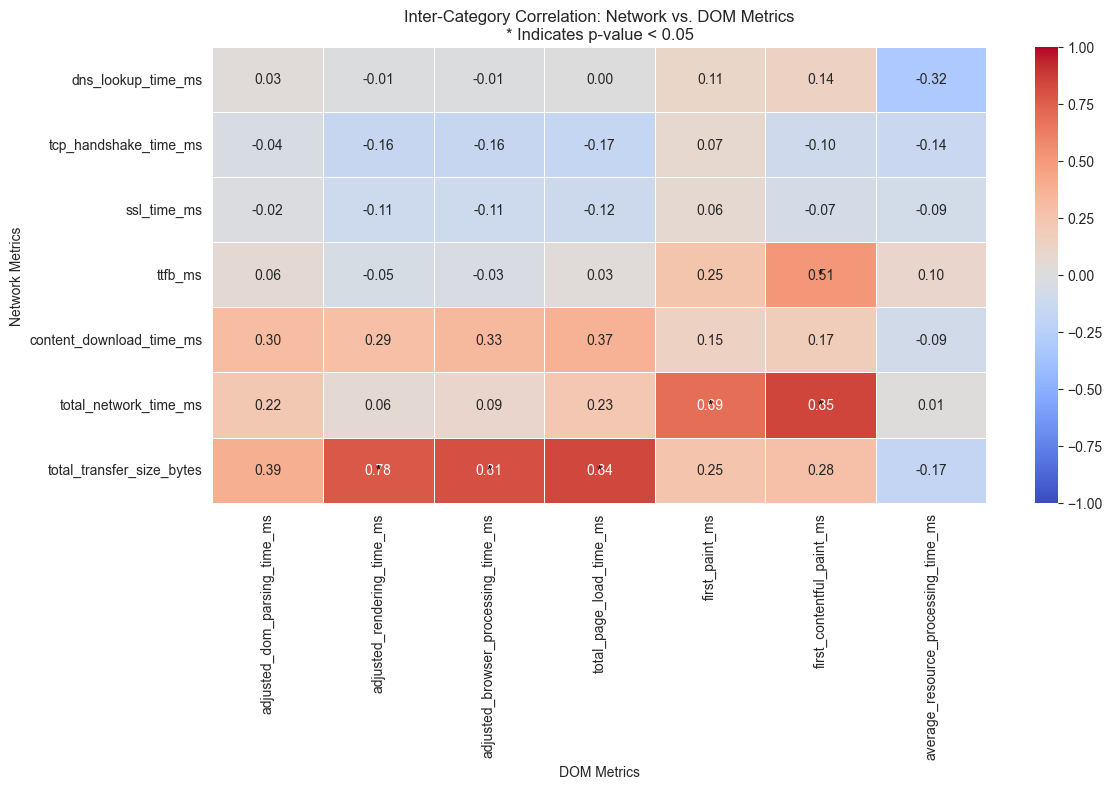

In [19]:
# Calculate correlation matrix between network and DOM metrics
inter_corr = df_cleaned[network_metrics + dom_metrics].corr().loc[network_metrics, dom_metrics]

# Function to calculate p-values
def calculate_pvalues(df, network_metrics, dom_metrics):
    pvalues = pd.DataFrame(index=network_metrics, columns=dom_metrics)
    for row in network_metrics:
        for col in dom_metrics:
            if df[row].dropna().shape[0] > 2:  # Ensure enough data points
                corr_coef, p_val = pearsonr(df[row], df[col])
                pvalues.loc[row, col] = p_val
            else:
                pvalues.loc[row, col] = np.nan
    return pvalues.astype(float)

# Calculate p-values
inter_pvalues = calculate_pvalues(df_cleaned, network_metrics, dom_metrics)

# Plot Inter-Category Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(inter_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={"size": 10}, linewidths=.5)

# Overlay p-values
for i in range(inter_corr.shape[0]):
    for j in range(inter_corr.shape[1]):
        p_val = inter_pvalues.iloc[i, j]
        if p_val < 0.05:
            plt.text(j + 0.5, i + 0.5, '*', color='black', ha='center', va='center')

plt.title('Inter-Category Correlation: Network vs. DOM Metrics\n* Indicates p-value < 0.05')
plt.xlabel('DOM Metrics')
plt.ylabel('Network Metrics')
plt.tight_layout()
plt.show()


Explanation:

    Correlation Matrix (inter_corr): Shows the Pearson correlation coefficients between each network and DOM metric.
    P-Values (inter_pvalues): Indicates the statistical significance of each correlation. A common threshold is p < 0.05.
    Heatmap Visualization:
        Colors: Represent the strength and direction of the correlation.
        Annotations: Display the correlation coefficient.
        Asterisks (*): Indicate statistically significant correlations (p < 0.05).

Interpretation:

    Near-Zero Correlations: Suggest successful isolation between network and DOM metrics.
    Significant Correlations: May indicate residual influences or measurement inaccuracies.

### 2. Intra-Category Correlation Heatmaps

These heatmaps help understand relationships within the same category of metrics.

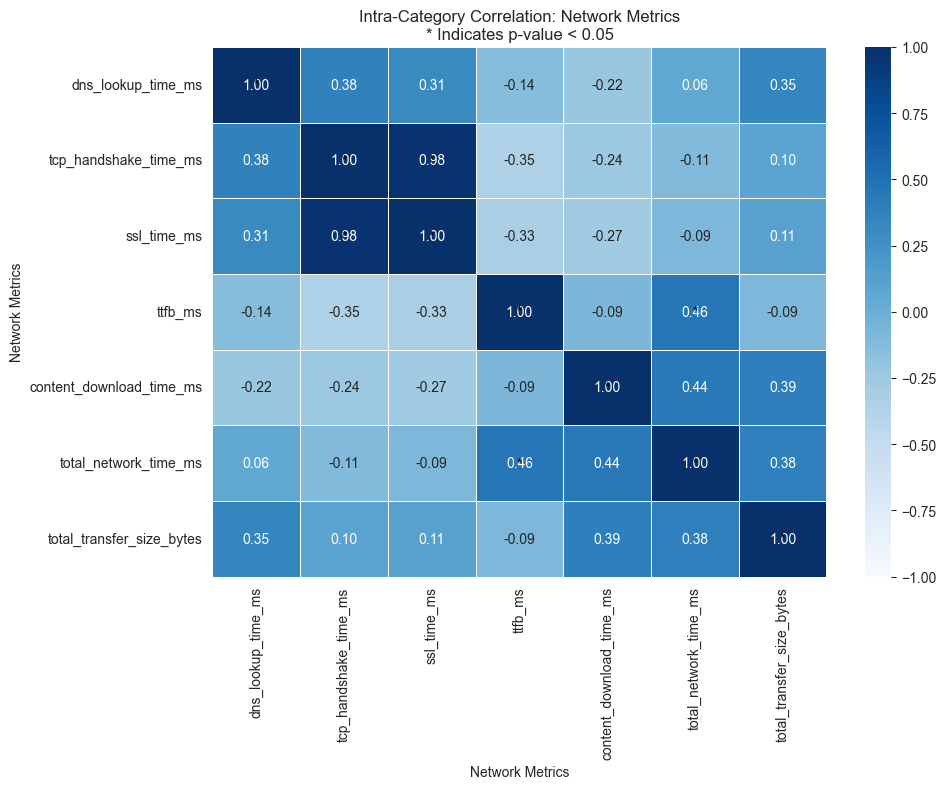

In [20]:
# Calculate correlation matrix for network metrics
network_corr = df_cleaned[network_metrics].corr()

# Function to calculate p-values for network metrics
network_pvalues = calculate_pvalues(df_cleaned, network_metrics, network_metrics)

# Plot Network Metrics Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(network_corr, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, 
            annot_kws={"size": 10}, linewidths=.5)

# Overlay p-values
for i in range(network_corr.shape[0]):
    for j in range(network_corr.shape[1]):
        p_val = network_pvalues.iloc[i, j]
        if p_val < 0.05:
            plt.text(j + 0.5, i + 0.5, '*', color='black', ha='center', va='center')

plt.title('Intra-Category Correlation: Network Metrics\n* Indicates p-value < 0.05')
plt.xlabel('Network Metrics')
plt.ylabel('Network Metrics')
plt.tight_layout()
plt.show()


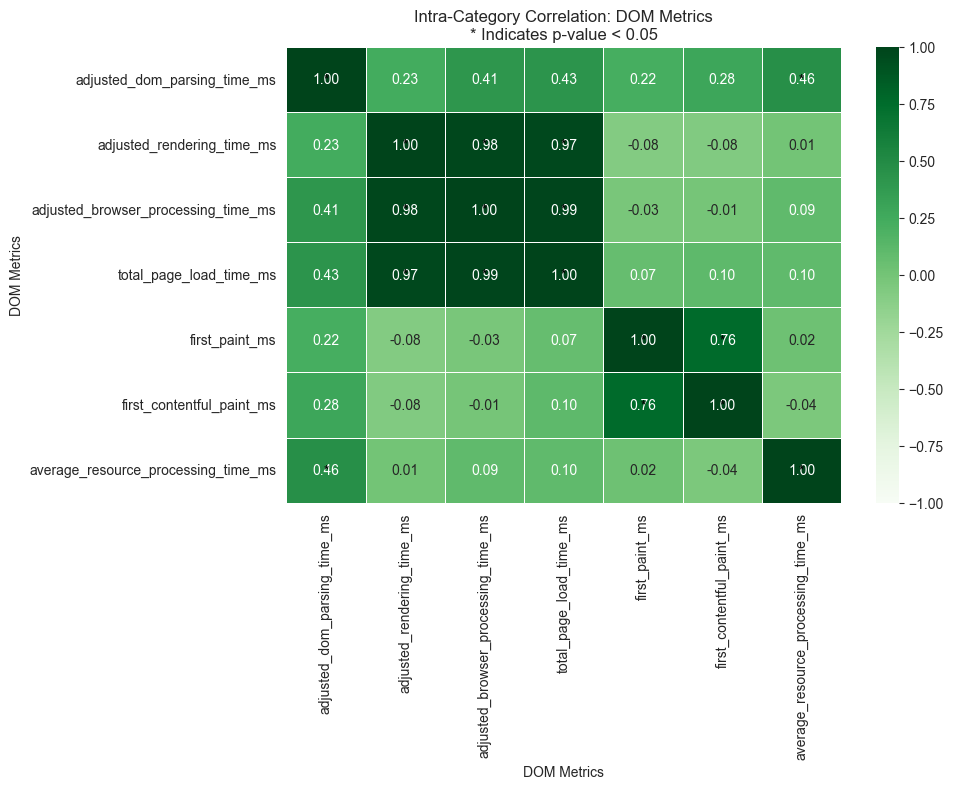

In [21]:
# Calculate correlation matrix for DOM metrics
dom_corr = df_cleaned[dom_metrics].corr()

# Function to calculate p-values for DOM metrics
dom_pvalues = calculate_pvalues(df_cleaned, dom_metrics, dom_metrics)

# Plot DOM Metrics Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dom_corr, annot=True, fmt=".2f", cmap='Greens', vmin=-1, vmax=1, 
            annot_kws={"size": 10}, linewidths=.5)

# Overlay p-values
for i in range(dom_corr.shape[0]):
    for j in range(dom_corr.shape[1]):
        p_val = dom_pvalues.iloc[i, j]
        if p_val < 0.05:
            plt.text(j + 0.5, i + 0.5, '*', color='black', ha='center', va='center')

plt.title('Intra-Category Correlation: DOM Metrics\n* Indicates p-value < 0.05')
plt.xlabel('DOM Metrics')
plt.ylabel('DOM Metrics')
plt.tight_layout()
plt.show()


Explanation:

    Network/Intra-Category Correlation Matrix (network_corr / dom_corr): Shows Pearson correlation coefficients within the same category.
    P-Values (network_pvalues / dom_pvalues): Indicates the statistical significance of each intra-category correlation.
    Heatmap Visualization:
        Colors: Represent the strength and direction of the correlation.
        Annotations: Display the correlation coefficient.
        Asterisks (*): Indicate statistically significant correlations (p < 0.05).

Interpretation:

    High Correlation Within Categories: May reveal interdependencies, such as DNS Lookup Time correlating with TCP Handshake Time.
    Low Correlation: Suggests metrics are measuring distinct performance aspects without redundancy.

## Exploratory Data Analysis (EDA)

We will explore the data through descriptive statistics and visualizations to uncover patterns and insights.


### Descriptive Statistics

Let's compute descriptive statistics for the performance metrics.


In [ ]:
# Compute descriptive statistics grouped by browser
df.groupby('browser')[numeric_columns].describe().T


### Visualizations

We will create various plots to visualize and compare the performance metrics across browsers.


### Line Plots for Key Metrics Over Time

These plots show how each performance metric changes over time for both browsers.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

# List of metrics to plot
metrics = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms',
    'total_transfer_size_bytes',
]

# Plot each metric over time
for metric in metrics:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_historical, x='measurement_date', y=metric, hue='browser', marker='o')
    plt.title(f'{metric.replace("_", " ").title()} Over Time by Browser')
    plt.xlabel('Measurement Date')
    plt.ylabel(f'{metric.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Rolling Averages to Smooth Trends

Applying rolling averages helps in visualizing underlying trends by smoothing out short-term fluctuations.


In [ ]:
# Define window size for rolling average (e.g., 3 measurements)
window_size = 3

for metric in metrics:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_historical, x='measurement_date', y=metric, hue='browser', marker='o', label='Original')
    
    # Calculate rolling average
    df_historical[f'{metric}_rolling'] = df_historical.groupby('browser')[metric].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    
    # Plot rolling average
    sns.lineplot(data=df_historical, x='measurement_date', y=f'{metric}_rolling', hue='browser', marker='o', linestyle='--', legend=False, label='Rolling Average')
    
    plt.title(f'{metric.replace("_", " ").title()} Over Time by Browser with Rolling Average')
    plt.xlabel('Measurement Date')
    plt.ylabel(f'{metric.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


### Correlation Heatmap

This heatmap displays the correlations between different performance metrics.


In [ ]:
# Select numeric columns
numeric_cols = df_historical.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr = df_historical[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Performance Metrics')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import os

# Define the path to the master historical CSV
master_historical_csv = "../data/historical/historical_performance_metrics.csv"

# Load the master historical data
if os.path.isfile(master_historical_csv):
    df_master_historical = pd.read_csv(master_historical_csv)
    display(df_master_historical.head())
    print(df_master_historical['browser'].unique())  # Should show both Chrome and Firefox
else:
    print(f"Master historical CSV file not found at {master_historical_csv}.")


#### Comparative Box Plots

Box plots allow us to compare the distribution of metrics across browsers.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

# List of metrics to plot
metrics = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'total_transfer_size_bytes',
]

for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='browser', y=metric)
    plt.title(f'Comparison of {metric.replace("_", " ").title()} Across Browsers')
    plt.xlabel('Browser')
    plt.ylabel(f'{metric.replace("_", " ").title()} (ms)')
    plt.show()


#### Violin Plots

Violin plots show the distribution of the data and can highlight differences in the density of the metrics.


In [ ]:
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='browser', y=metric, inner='quartile')
    plt.title(f'Distribution of {metric.replace("_", " ").title()} Across Browsers')
    plt.xlabel('Browser')
    plt.ylabel(f'{metric.replace("_", " ").title()} (ms)')
    plt.show()



#### Grouped Bar Charts for Top Websites

We will compare performance metrics for the top 10 websites based on average total page load time.


In [ ]:
# Choose a metric
metric = 'total_page_load_time_ms'

# Get top N websites based on average metric
top_n = 10
top_sites = (
    df.groupby('website')[metric]
    .mean()
    .sort_values(ascending=False)
    .head(top_n)
    .index
)

df_top_sites = df[df['website'].isin(top_sites)]

plt.figure(figsize=(12, 8))
sns.barplot(
    x=metric,
    y='website',
    hue='browser',
    data=df_top_sites,
    orient='h'
)
plt.title(f'Comparison of {metric.replace("_", " ").title()} for Top {top_n} Websites')
plt.xlabel(f'{metric.replace("_", " ").title()} (ms)')
plt.ylabel('Website')
plt.legend(title='Browser')
plt.tight_layout()
plt.show()


#### Performance Difference Between Browsers

We will calculate and visualize the difference in performance metrics between Chrome and Firefox for each website.


In [ ]:
# Pivot the DataFrame
df_pivot = df.pivot_table(
    index='website',
    columns='browser',
    values=metric
).dropna()

# Check if we have exactly two browsers
if len(df['browser'].unique()) == 2:
    browsers = df['browser'].unique()
    browser_a, browser_b = browsers
    df_pivot['difference'] = df_pivot[browser_a] - df_pivot[browser_b]
    
    # Sort by difference
    df_pivot_sorted = df_pivot.sort_values('difference', ascending=False)
    
    # Plot the differences
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='difference',
        y=df_pivot_sorted.index,
        data=df_pivot_sorted.reset_index(),
        orient='h'
    )
    plt.title(f'Difference in {metric.replace("_", " ").title()} Between {browser_a} and {browser_b}')
    plt.xlabel(f'Difference in {metric.replace("_", " ").title()} (ms)')
    plt.ylabel('Website')
    plt.axvline(0, color='grey', linestyle='--')
    plt.tight_layout()
    plt.show()
else:
    print("Performance difference plot requires exactly two browsers.")


#### Correlation Heatmap

A correlation heatmap helps us understand the relationships between different performance metrics.


In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Performance Metrics')
plt.tight_layout()
plt.show()


#### Scatter Plots with Regression Lines

We will examine the relationship between total transfer size and adjusted browser processing time.


In [ ]:
x_metric = 'total_transfer_size_bytes'
y_metric = 'adjusted_browser_processing_time_ms'

sns.lmplot(
    data=df,
    x=x_metric,
    y=y_metric,
    hue='browser',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.5}
)
plt.title(f'{y_metric.replace("_", " ").title()} vs {x_metric.replace("_", " ").title()}')
plt.xlabel(f'{x_metric.replace("_", " ").title()}')
plt.ylabel(f'{y_metric.replace("_", " ").title()}')
plt.tight_layout()
plt.show()


## Conclusions and Next Steps

**Summary of Findings:**

- Based on the analysis, we observed that...

*(Add your interpretations and key takeaways here.)*

**Next Steps:**

- Investigate further into...
- Consider collecting additional data on...
- Share these findings with the team for feedback and action.

---

**Note:** This notebook provides an initial analysis of the browser performance data. For ongoing monitoring and more advanced analyses, consider integrating a database solution and automating the reporting process.
